<a href="https://colab.research.google.com/github/hosseinrezaie0/CI-T.A-Dr.Helmi/blob/main/Neural%20Network/MLP/House%20Price%20Prediction/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, Y = data.data, data.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [4]:
x_train.shape

(16512, 8)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
model = Sequential([
    Dense(32, activation='tanh', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

In [8]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 1.2205 - mae: 0.7736 - val_loss: 0.4129 - val_mae: 0.4618
Epoch 2/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3985 - mae: 0.4509 - val_loss: 0.3887 - val_mae: 0.4354
Epoch 3/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3577 - mae: 0.4251 - val_loss: 0.3816 - val_mae: 0.4280
Epoch 4/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3533 - mae: 0.4207 - val_loss: 0.3597 - val_mae: 0.4168
Epoch 5/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3417 - mae: 0.4123 - val_loss: 0.3455 - val_mae: 0.4034
Epoch 6/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3298 - mae: 0.4048 - val_loss: 0.3446 - val_mae: 0.4092
Epoch 7/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3253 - mae: 0.3998 - val_loss: 0.3311 - val_mae: 0.3993
Epoch 8/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3123 - mae: 0.3930 - val_loss: 0.3266 - val_mae: 0.3939
Epoch 9/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - l

In [9]:
loss_train = history.history['loss']
acc_train = history.history['mae']
loss_val = history.history['val_loss']
acc_val = history.history['val_mae']

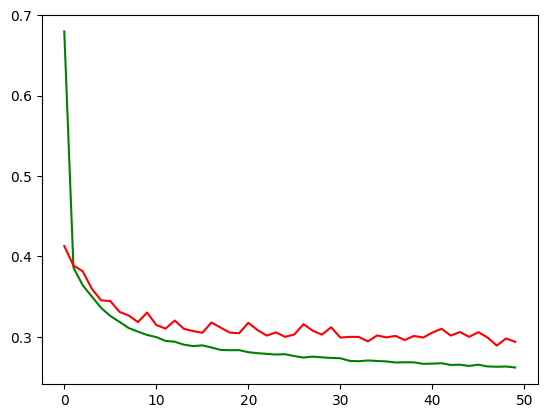

In [10]:
plt.plot(loss_train, label='Training Loss', color='g')
plt.plot(loss_val, label='Validation Loss', color='r')

In [11]:
loss, mae = model.evaluate(x_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2994 - mae: 0.3789


In [ ]:
loss_data1, mae_data1 = model.evaluate([[]])